<a href="https://colab.research.google.com/github/ndsoi/ndsoi/blob/main/%E5%BD%B1%E8%AF%84%E6%83%85%E6%84%9F%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

导入相应的库

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np



1. 获取数据集以及对数据做预处理<br>
   导入了一个封装好的库<br>
（1）只保留频率为前10000的词以及词序——（减少数据维度和运算量）<br>


In [2]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

# 查看返回的train_data (应该是数字序列，每个数字代表一个单词)
print(train_data[0])

# 查看返回的标签，应该是0/1
print(train_labels[0])

# 将数字序列还原成文本
# 获取原先的映射字典
word_index = imdb.get_word_index()


# 换键值
index_to_word = dict([(value,key) for key,value in word_index.items()])

# 翻译出第一句
decode_first_sequence = " ".join([index_to_word.get(i-3,"?") for i in train_data[0]])
print(decode_first_sequence)


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
? this film was just brilliant casting location scenery st

（2）统一输入数据的维度，有两种方式：方法一是找出最长的样本序列，然后将其他样本都填充到最长<br>
方法二是multi-hot编码，只有单词在不在，没有词频没有相对位置关系

In [3]:
# multihot
def vectorize_sequences(sequences,dimension=10000):
  result = np.zeros((len(sequences),10000))
  for i,sequence in enumerate(sequences):
    for j in sequence:
      result[i,j] = 1
  return result


print(train_data.shape)
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

(25000,)


标签向量化

In [4]:
train_labels = np.asarray(train_labels).astype("float32")
test_labels = np.asarray(test_labels).astype("float32")

划分出验证集

In [5]:
vaild_data = train_data[:10000]
vaild_labels = train_labels[:10000]
train_data = train_data[10000:]
train_labels = train_labels[10000:]


print(train_data.shape)

(15000, 10000)


2.定义模型
两个Dense中间层，units为16，激活函数为relu
最后一层输出概率

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(units=16,activation="relu"),
    layers.Dense(units=16,activation="relu"),
    layers.Dense(units=1,activation="sigmoid")
])

3.编译与训练<br>
优化器采用rmsprop<br>
损失更推荐 交叉熵<br>
监测指标设为精度<br>
训练：补1的内容——划分验证集 <br>
fit指定训练集和验证集以及batch_size <br>
这里再次说明一下：<br>
batch_size是指训练集的一小部分，用来更新参数用的<br>
验证集是每轮epoch结束后，计算当前模型的性能，不会参与参数更新

In [7]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(train_data,train_labels,epochs=10,batch_size=512,validation_data=(vaild_data,vaild_labels))

Epoch 1/10
30/30 [==============================] - 3s 74ms/step - loss: 0.5201 - accuracy: 0.7798 - val_loss: 0.3950 - val_accuracy: 0.8688
Epoch 2/10
30/30 [==============================] - 1s 35ms/step - loss: 0.3230 - accuracy: 0.8947 - val_loss: 0.3160 - val_accuracy: 0.8818
Epoch 3/10
30/30 [==============================] - 1s 34ms/step - loss: 0.2440 - accuracy: 0.9184 - val_loss: 0.2843 - val_accuracy: 0.8890
Epoch 4/10
30/30 [==============================] - 1s 38ms/step - loss: 0.1963 - accuracy: 0.9347 - val_loss: 0.2753 - val_accuracy: 0.8894
Epoch 5/10
30/30 [==============================] - 2s 55ms/step - loss: 0.1631 - accuracy: 0.9475 - val_loss: 0.3067 - val_accuracy: 0.8753
Epoch 6/10
30/30 [==============================] - 1s 41ms/step - loss: 0.1385 - accuracy: 0.9547 - val_loss: 0.3059 - val_accuracy: 0.8811
Epoch 7/10
30/30 [==============================] - 1s 35ms/step - loss: 0.1193 - accuracy: 0.9629 - val_loss: 0.2962 - val_accuracy: 0.8853
Epoch 8/10
30

4.评估模型<br>
用matplotlib.pyplot绘图<br>
绘制epoches-loss和epoches-valloss的图像<br>
如果出现过拟合，可以减少epoch，从头训练一个模型<br>

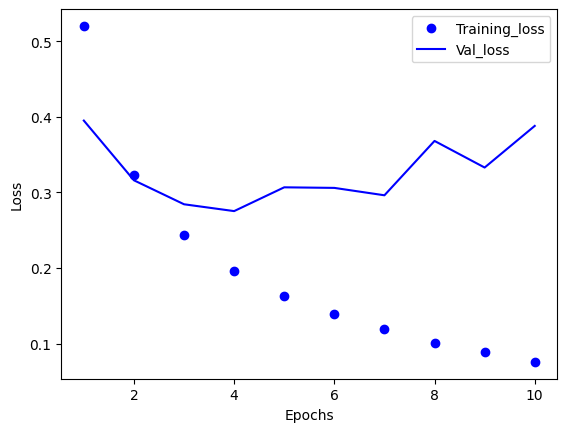

In [8]:
import matplotlib.pyplot as plt
history = history.history
y_train_loss = history['loss']
x_epoches = range(1,len(y_train_loss)+1)

plt.plot(x_epoches,y_train_loss,"bo",label="Training_loss")

y_val_loss = history['val_loss']
plt.plot(x_epoches,y_val_loss,"b",label="Val_loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()




可以从图像看出来，epoch超过5的时候以及过拟合了，可以提前停止训练

Epoch 1/4
30/30 [==============================] - 3s 69ms/step - loss: 0.5381 - accuracy: 0.7617 - val_loss: 0.4098 - val_accuracy: 0.8606
Epoch 2/4
30/30 [==============================] - 1s 35ms/step - loss: 0.3353 - accuracy: 0.8904 - val_loss: 0.3219 - val_accuracy: 0.8794
Epoch 3/4
30/30 [==============================] - 1s 48ms/step - loss: 0.2495 - accuracy: 0.9161 - val_loss: 0.3152 - val_accuracy: 0.8718
Epoch 4/4
30/30 [==============================] - 1s 47ms/step - loss: 0.2024 - accuracy: 0.9306 - val_loss: 0.2753 - val_accuracy: 0.8877


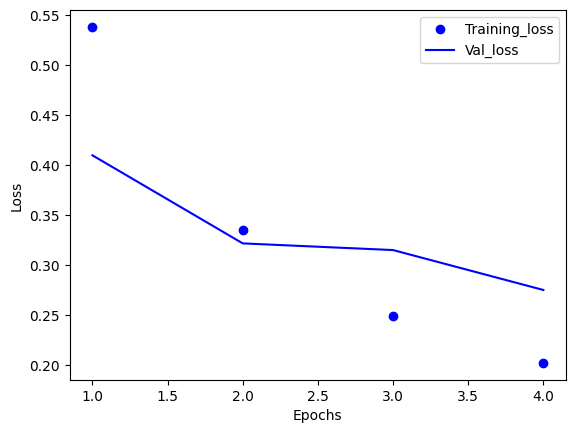

In [9]:
model = keras.Sequential([
    layers.Dense(units=16,activation="relu"),
    layers.Dense(units=16,activation="relu"),
    layers.Dense(units=1,activation="sigmoid")
])
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

history = model.fit(train_data,train_labels,epochs=4,batch_size=512,validation_data=(vaild_data,vaild_labels))  # 减少了训练轮次

# 重新绘制图像
history = history.history
y_train_loss = history['loss']
x_epoches = range(1,len(y_train_loss)+1)

plt.plot(x_epoches,y_train_loss,"bo",label="Training_loss")

y_val_loss = history['val_loss']
plt.plot(x_epoches,y_val_loss,"b",label="Val_loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

In [10]:
# 随机找一个test还原


predictions = model.predict(test_data)

# 应用训练好的模型 predict函数
print(f"真实值:{test_labels}")

print(f"预测值:{predictions}")

782/782 [==============================] - 2s 2ms/step
真实值:[0. 1. 1. ... 0. 0. 0.]
预测值:[[0.25412077]
 [0.99605656]
 [0.82601666]
 ...
 [0.08723006]
 [0.11912512]
 [0.455034  ]]


大失误：刚刚model最后一层写成了softmax导致一水的0.9999994和1.0